### Understanding different evaluation metrics for Classification Models 
1. Accuracy Score
2. Confusion Metrics 
3. Precision Score 
4. F1 Score 
5. Recall Score 

In [1]:
#Importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### About Dataset
- It's a clear classification problem where we need to classify and predict the person having `breast cancer` of not 
- Models to be used and comparision: - Decision Tree, Support Vector Machine, K-NN and Random Forest 

In [51]:
#Collecting Dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
Y = data.target

#Get target labels 
labels = data.target_names
features = data.feature_names
print(labels)

['malignant' 'benign']


In [13]:
#Getting insights on datasets 
df_features = pd.DataFrame(X, columns= features)
df_features.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [14]:
#Get more information about features of datasets 
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
#Data Preprocessing, using standarScaler method as all features are odinal values 
from sklearn.preprocessing import StandardScaler 

standard = StandardScaler()
stand_x = standard.fit_transform(X)

In [25]:
#Adding normal distribution as noise in the standarized features
# To get same randomly generated values after every 42 rows  
np.random.seed(42) 
noise_factor = 0.5
noise_x = stand_x + noise_factor * np.random.normal(loc= 0, scale= 1.0, size= X.shape)

In [30]:
#Two dataframes: - 1. Normal Standard features, 2. Noisy_standard feature 
df = pd.DataFrame(stand_x, columns= features)
df_noisy = pd.DataFrame(noise_x, columns= features)

In [31]:
print('Standard features dataframe: - \n')
df.head()


Standard features dataframe: - 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [32]:
print('Noisy features dataframe \n')
df_noisy.head()

Noisy features dataframe 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


### Visualization of Noisy and standard features dataframes 
- Noisy Features dataframes 
- Standard Features dataframes 

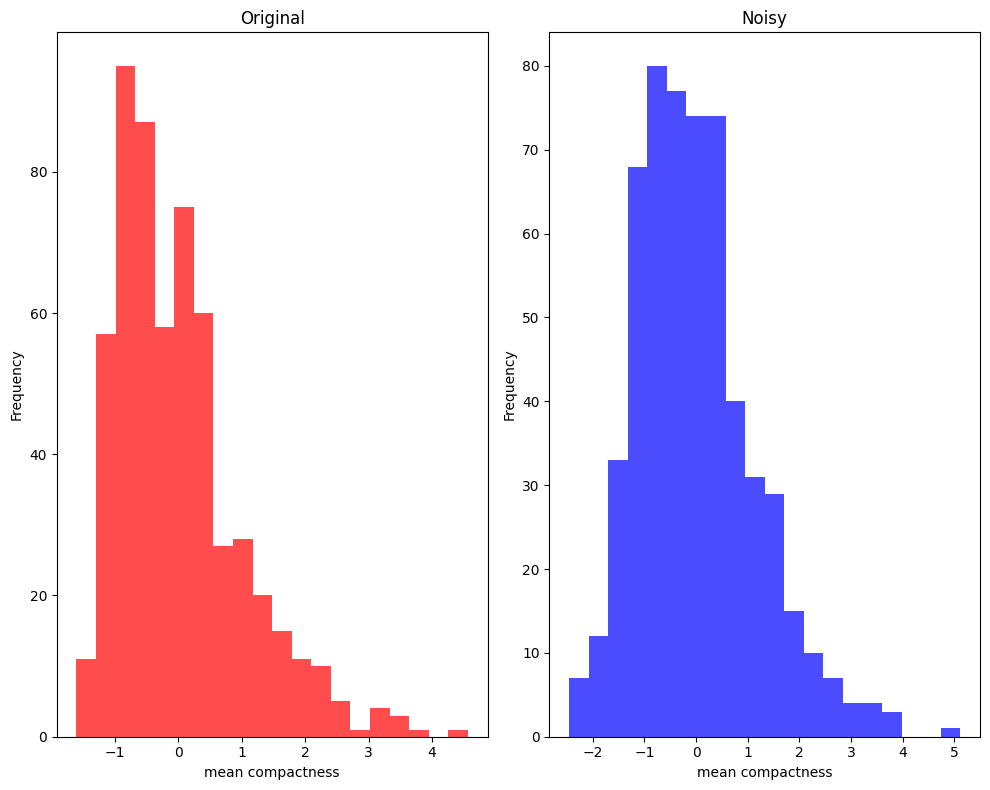

In [56]:
#Histogram Visualizaiton 
fig = plt.figure(figsize= (10, 8))

#Standard features 
pt1 = plt.subplot(1, 2, 1)
pt1.hist(df[features[5]], bins= 20, label= 'Original', alpha= 0.7, color= 'red')
pt1.set_xlabel(features[5])
pt1.set_ylabel('Frequency')
pt1.set_title('Original')

#Noisy features 
pt2 = plt.subplot(1, 2, 2)
pt2.hist(df_noisy[features[5]], bins= 20, label= 'Noisy', alpha= 0.7, color= 'blue')
pt2.set_xlabel(features[5])
pt2.set_ylabel('Frequency')
pt2.set_title('Noisy')
plt.tight_layout()
plt.show()

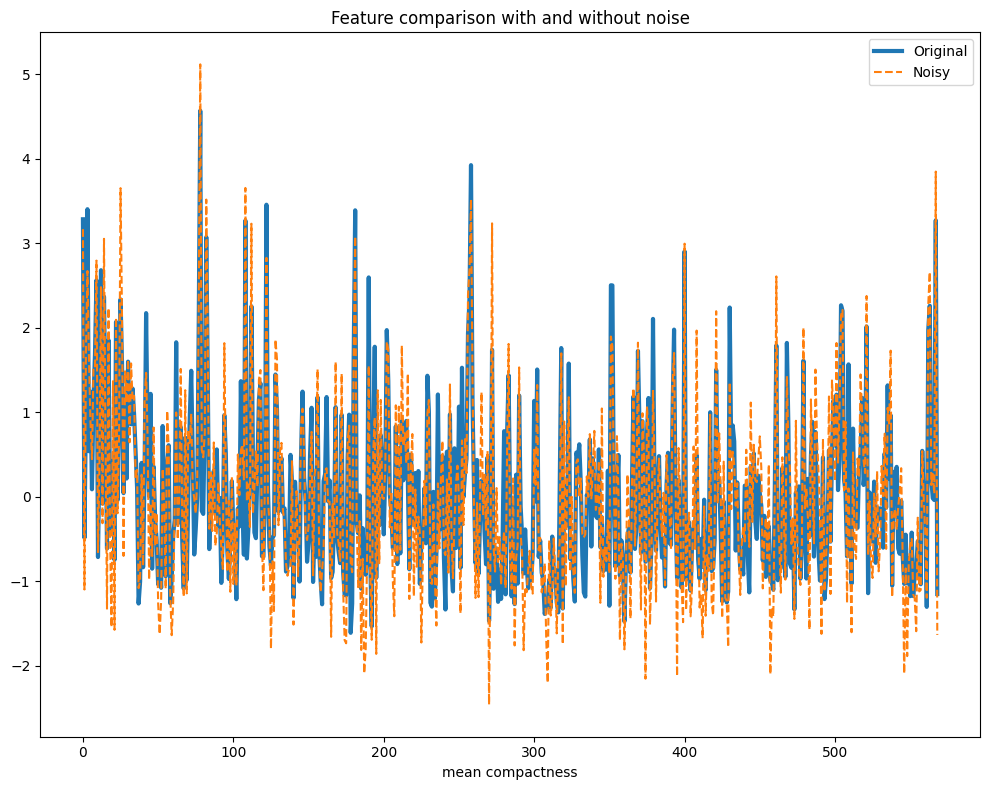

In [59]:
#Plot visualization 
plt.figure(figsize= (10, 8))
plt.plot(df[features[5]], lw= 3, label= 'Original')
plt.plot(df_noisy[features[5]], '--', label= 'Noisy')
plt.xlabel(features[5])
plt.title('Feature comparison with and without noise')
plt.legend(loc= True)
plt.tight_layout()
plt.show()

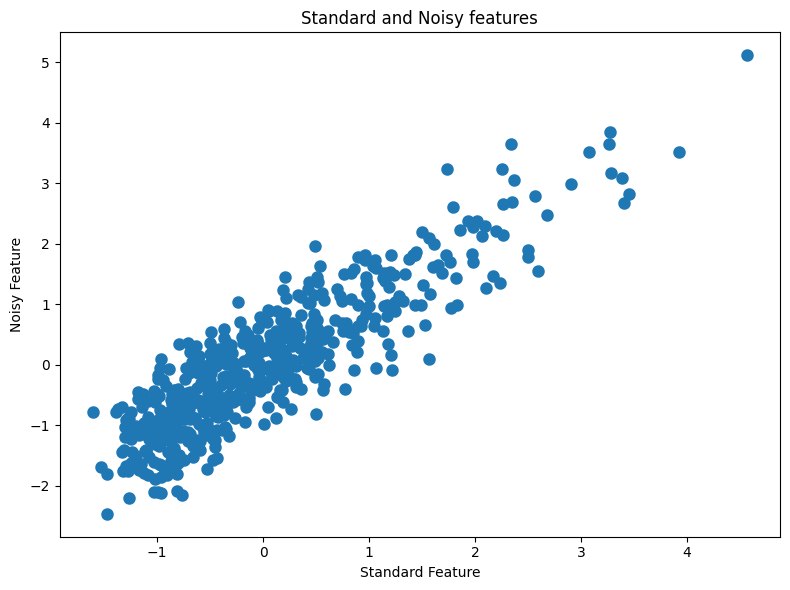

In [61]:
#Visualization Scatter plot 
plt.figure(figsize= (8, 6))
plt.scatter(df[features[5]], df_noisy[features[5]], lw= 3)
plt.xlabel('Standard Feature')
plt.ylabel('Noisy Feature')

plt.title('Standard and Noisy features')
plt.tight_layout()
plt.show()

- From these visualizations, we can predict that standard dataframe and noisy dataframes are both comparable. 
- Now we can, use different models to predict the best fit of the dataframe. 

In [62]:
#Splitting dataset into training and testing sets 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(noise_x, Y, test_size= 0.3, random_state= 42)

In [66]:
#1. KNN - Model 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2, weights= 'uniform')

knn = knn.fit(x_train, y_train)

In [67]:
#2. Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)

decision_tree = decision_tree.fit(x_train, y_train)

In [71]:
#3. Support Vector Machine Model 
from sklearn.svm import SVC

support_vector = SVC(kernel= 'rbf', random_state= 42, max_iter= 1000, C= 1)

support_vector = support_vector.fit(x_train, y_train)

In [69]:
#4. Ensemble: Bagging (Random Forest Model) 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=  100, criterion= 'entropy', max_depth= 4, random_state= 42)

random_forest = random_forest.fit(x_train, y_train)

In [72]:
#Prediction of each model on the testing sets 
knn_predict = knn.predict(x_test)

tree_predict = decision_tree.predict(x_test)

svc_predict = support_vector.predict(x_test)

forest_predict = random_forest.predict(x_test)

Text(627.9949494949494, 0.5, 'Actual')

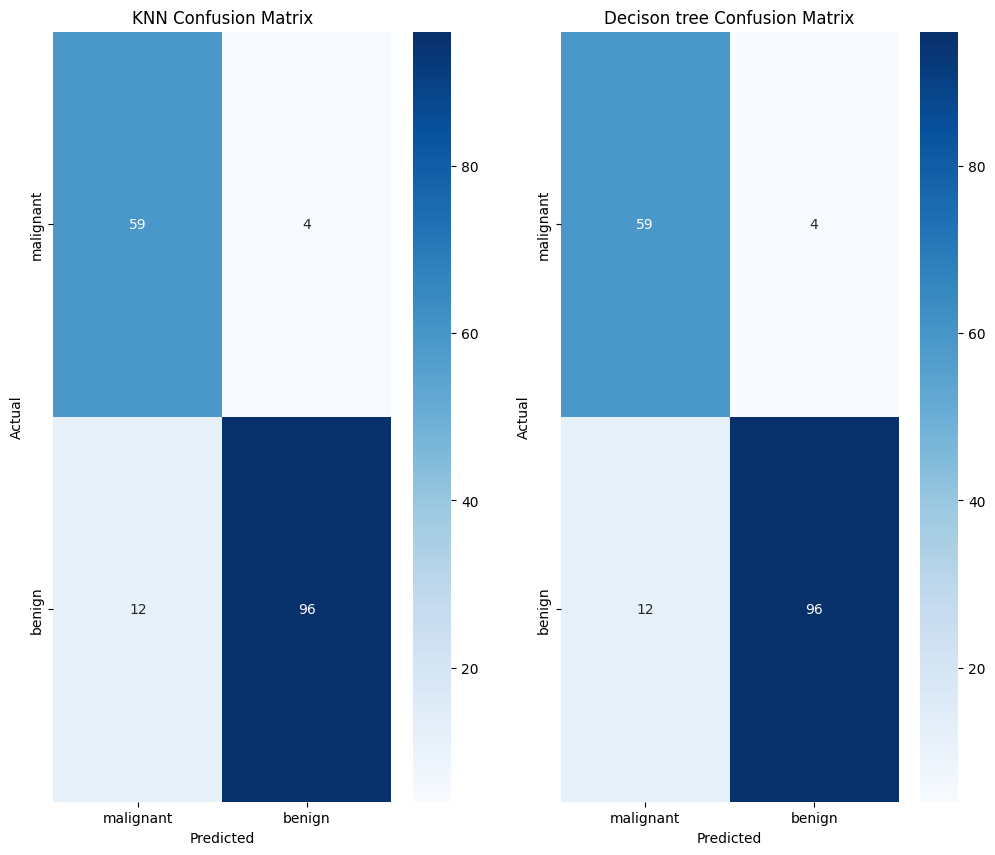

In [90]:
#Visualization of different model prediction's 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 2, figsize= (12, 10))

#KNN Model 
knn_matrix = confusion_matrix(y_test, knn_predict)
sns.heatmap(knn_matrix, annot= True, cmap= 'Blues', fmt='d', xticklabels= labels, yticklabels= labels, ax= ax[0])
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

#Decison Tree Model 
tree_matrix = confusion_matrix(y_test, tree_predict)
sns.heatmap(tree_matrix, annot= True, cmap= 'Blues', fmt='d', xticklabels= labels, yticklabels= labels, ax= ax[1])
ax[1].set_title('Decison tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

Text(627.9949494949494, 0.5, 'Actual')

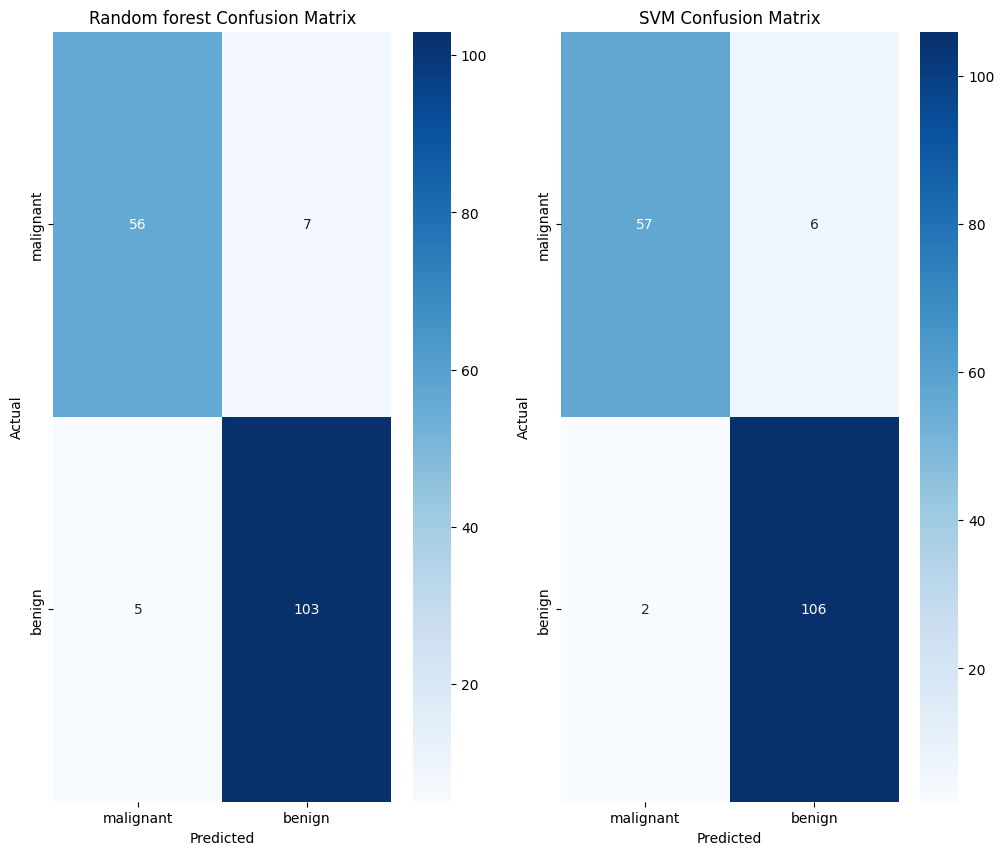

In [96]:
fig, ax = plt.subplots(1, 2, figsize= (12, 10))

#Random Forest
forest_matrix = confusion_matrix(y_test, forest_predict)
sns.heatmap(forest_matrix, annot= True, cmap= 'Blues', fmt='d', xticklabels= labels, yticklabels= labels, ax= ax[0])
ax[0].set_title('Random forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

#SVM Model 
svc_matrix = confusion_matrix(y_test, svc_predict)
sns.heatmap(svc_matrix, annot= True, cmap= 'Blues', fmt='d', xticklabels= labels, yticklabels= labels, ax= ax[1])
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')


### Model Evaluation: - 
- From the confusion matrix of all the models, 
    - SVC << Random forest << Decision Tree ~ KNN 
- Support Vector Classification works well in this model of dataset. 

In [99]:
#Accuracy Score of Models
from sklearn.metrics import accuracy_score

print(f'Accuracy Score of KNN Model: {accuracy_score(y_test, knn_predict): .3f}')
print(f'Accuracy Score of Decision Model: {accuracy_score(y_test, tree_predict): .3f}')
print(f'Accuracy Score of Random Forest: {accuracy_score(y_test, forest_predict): .3f}')
print(f'Accuracy Score of SVM: {accuracy_score(y_test, svc_predict): .3f}')

Accuracy Score of KNN Model:  0.906
Accuracy Score of Decision Model:  0.906
Accuracy Score of Random Forest:  0.930
Accuracy Score of SVM:  0.953
